In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
boston= pd.read_csv("BostonHousing.csv")

## crim: Уровень преступности на душу населения по городам
## zn: Доля земель, зонированных под жилую застройку площадью более 25 000 кв. футов
## indus: Доля акров, не относящихся к розничной торговле на один город
## chas: Фиктивная переменная реки Чарльз (1, если территория ограничивается рекой; 0 в противном случае)
## nox: Концентрация оксидов азота (частей на 10 миллионов)
## rm: Среднее количество комнат в жилом помещении
## age: Доля домовладельцев, построенных до 1940 года
## dis: Взвешенные расстояния до пяти центров занятости в Бостоне
## rad: Индекс доступности к радиальным магистралям
## tax: Налог на имущество в полном объеме за $10 000

## ptratio: Соотношение учеников и учителей по городам
## b: 1000(Bk - 0.63)^2, где Bk - доля чернокожих по городам
## lstat: Процент населения с низким социальным статусом
## medv: Медианная стоимость домов, занимаемых владельцами, в $1000


In [9]:
boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [69]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [62]:
boston.shape

(506, 14)

In [70]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [71]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [72]:
matrix=boston.corr()

<AxesSubplot:>

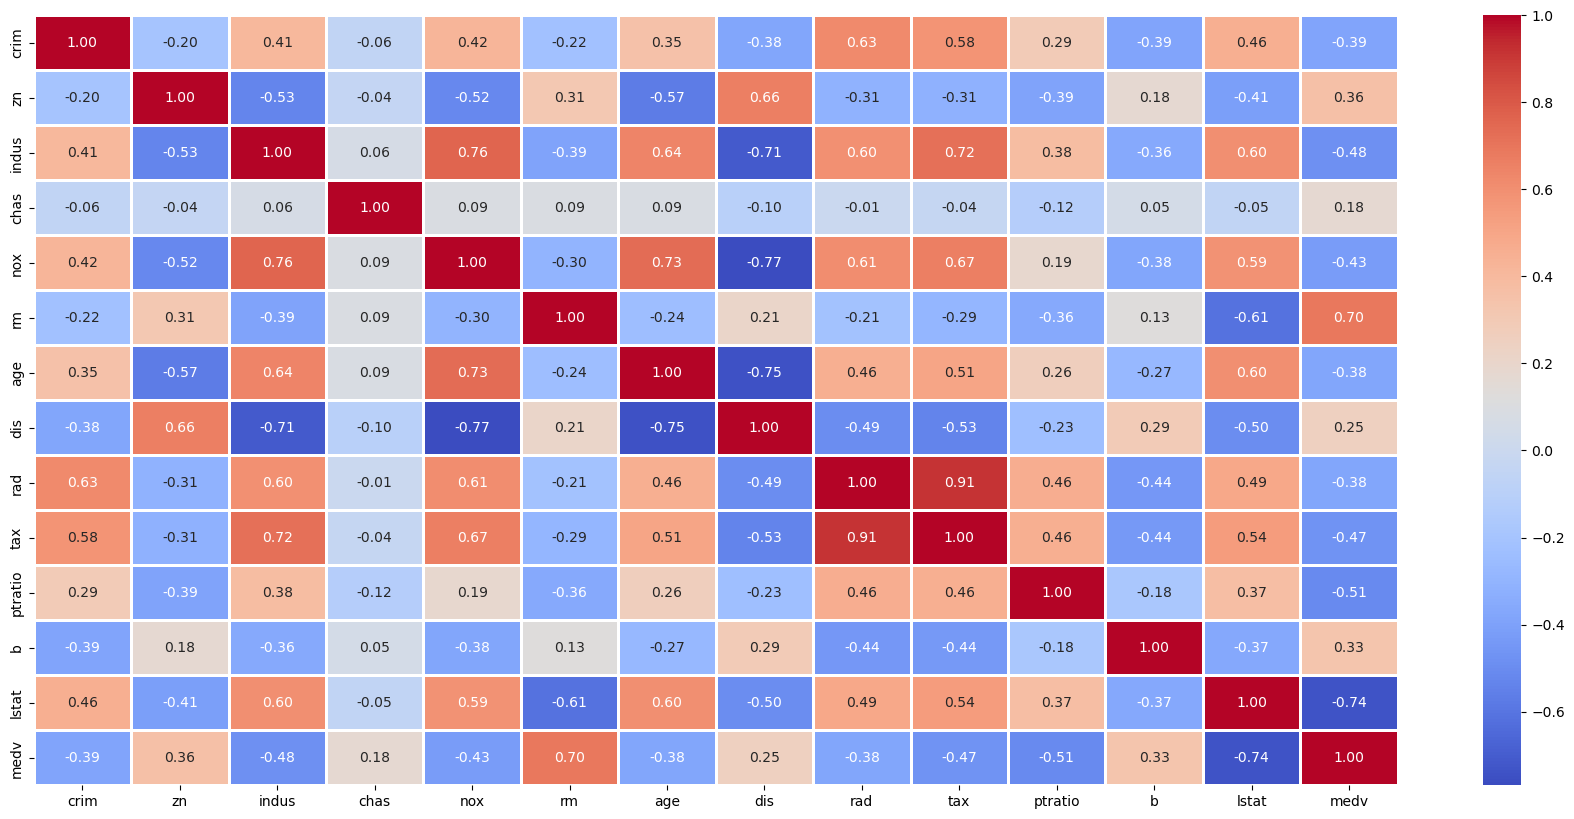

In [73]:
plt.figure(figsize=(22,10))
sns.heatmap(matrix,annot=True, cmap='coolwarm', fmt=".2f", linewidths=.9)

# самые сильные корреляции между rm и medv, istat medv,istat age,tax indus,rad tax, dis nox,indus nox

# атрибут chas никак не взаимодействует с другими атрибутами, его можно удалить 

In [10]:
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


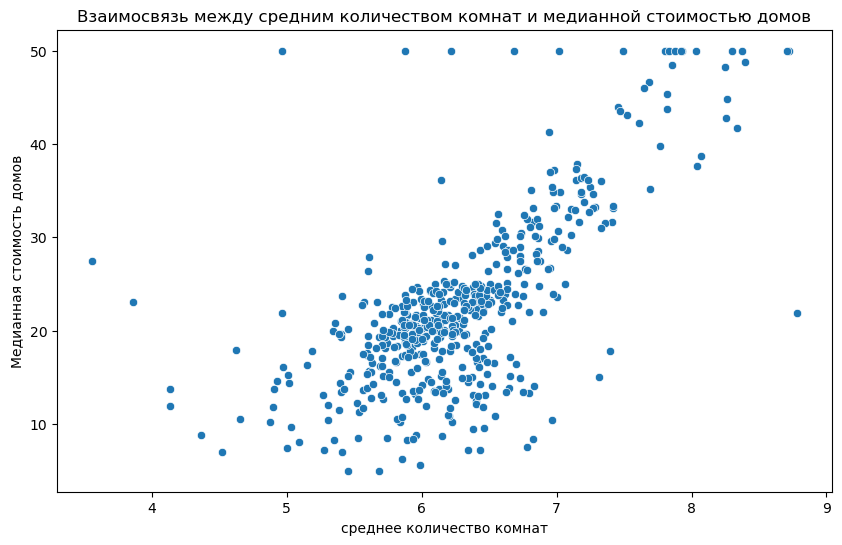

In [74]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rm', y='medv', data=boston)
plt.title('Взаимосвязь между средним количеством комнат и медианной стоимостью домов')
plt.xlabel('среднее количество комнат')
plt.ylabel('Медианная стоимость домов')
plt.show()

# чем больше в доме комнат, тем выше его цена

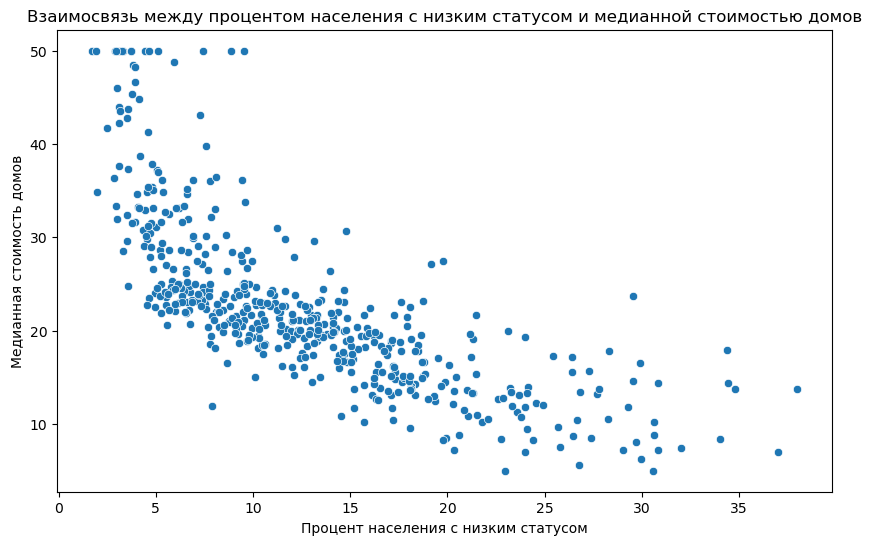

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lstat', y='medv', data=boston)
plt.title('Взаимосвязь между процентом населения с низким статусом и медианной стоимостью домов')
plt.xlabel('Процент населения с низким статусом')
plt.ylabel('Медианная стоимость домов')
plt.show()

# у процента населения с низким статусом цены на дома значительно ниже

In [82]:
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [24]:
nalog=boston.groupby(['indus','tax'])['medv'].mean()
nalog

indus  tax
0.46   255    50.000000
0.74   313    24.700000
1.21   198    50.000000
1.22   226    35.400000
1.25   335    24.750000
                ...    
18.10  666    16.403788
19.58  403    23.650000
21.89  437    17.093333
25.65  188    19.428571
27.74  711    12.800000
Name: medv, Length: 77, dtype: float64

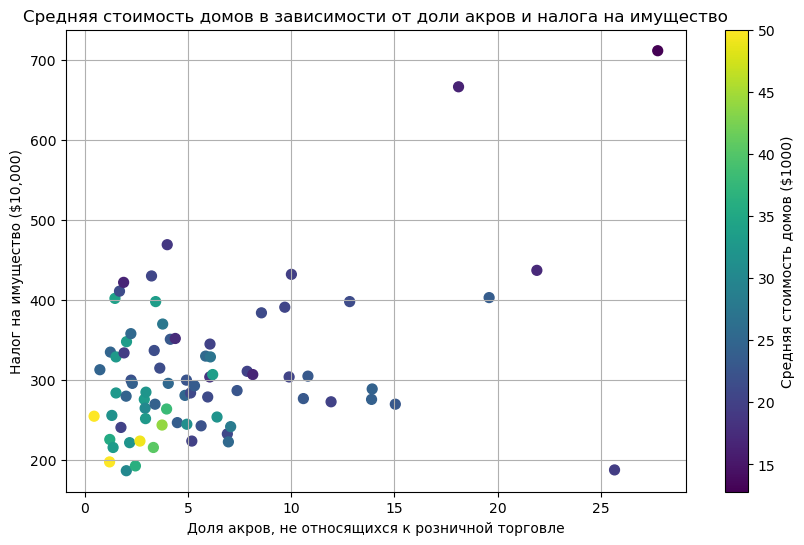

In [46]:
nalog = boston.groupby(['indus', 'tax'])['medv'].mean()
indus, tax = zip(*nalog.index)
plt.figure(figsize=(10, 6))
plt.scatter(indus, tax, c=nalog.values, cmap='viridis', marker='o', s=50)
plt.colorbar(label='Средняя стоимость домов ($1000)')
plt.xlabel('Доля акров, не относящихся к розничной торговле')
plt.ylabel('Налог на имущество ($10,000)')
plt.title('Средняя стоимость домов в зависимости от доли акров и налога на имущество')
plt.grid(True)
plt.show()


# в целом можно сказать, что высота налога и наличие промышленных предприятий не имеют сильной взаимосвязи со стоимостью дома

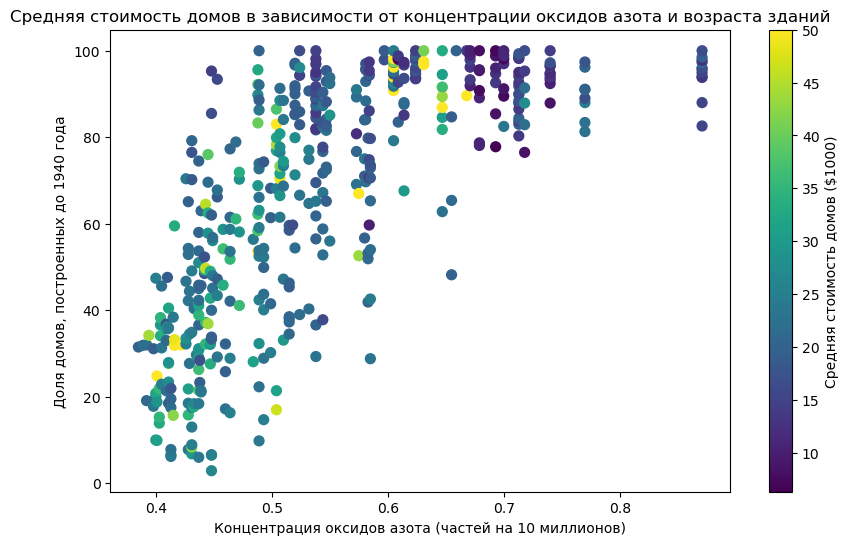

In [44]:
starye_doma = boston.groupby(['nox', 'age'])['medv'].mean()
nox, age = zip(*starye_doma.index)
plt.figure(figsize=(10, 6))
plt.scatter(nox, y=age, c=starye_doma.values, cmap='viridis', marker='o', s=50)
plt.colorbar(label='Средняя стоимость домов ($1000)')
plt.xlabel('Концентрация оксидов азота (частей на 10 миллионов)')
plt.ylabel('Доля домов, построенных до 1940 года')
plt.title('Средняя стоимость домов в зависимости от концентрации оксидов азота и возраста зданий')
plt.show()

# достаточно странное наблюдение, что дома, с самым грязым воздухом и построенные до 1940 года являются достаточно недешевыми

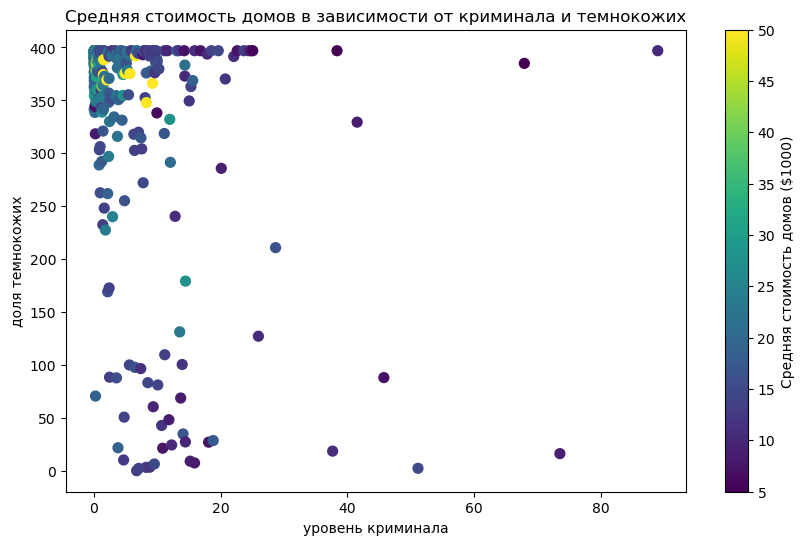

In [65]:
criminal = boston.groupby(['crim', 'b'])['medv'].mean()
crim,b = zip(*criminal.index)
plt.figure(figsize=(10, 6))
plt.scatter(crim, b, c=criminal.values, cmap='viridis', marker='o', s=50)
plt.colorbar(label='Средняя стоимость домов ($1000)')
plt.xlabel('уровень криминала')
plt.ylabel('доля темнокожих')
plt.title('Средняя стоимость домов в зависимости от криминала и темнокожих')
plt.show()

# самые высокие цены наблюдаются в районах с минималным уровнем криминала. и несмотря на высокую корелляцию между количеством темнокожих и уровнем криминала, доля темнокожих никак не влияет на стоимость 

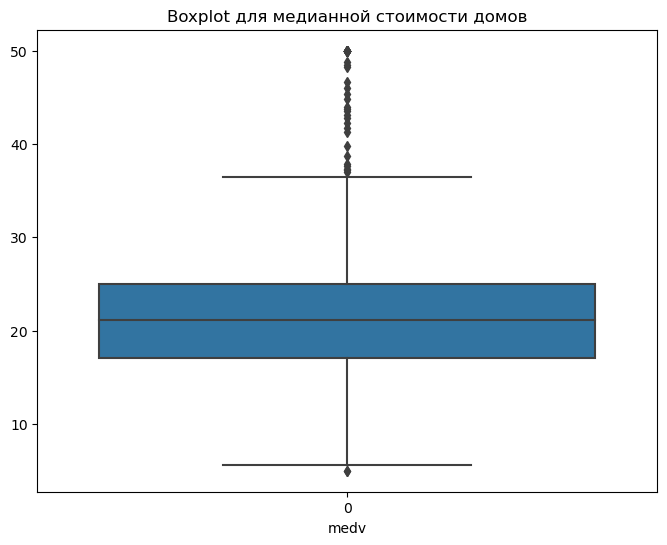

In [76]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=boston['medv'])
plt.xlabel('medv')
plt.title('Boxplot для медианной стоимости домов')
plt.show()

# как мы можем видеть, у атрибута medv много выбросов, среднее значение равно приблизительно 21-22. максимальное значение 50, минимальное 5